<a href="https://colab.research.google.com/github/620593/ML/blob/main/simple_linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('/content/height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


- 1. Divide the dataset into dependent and independent Features
- 2. Train test split using sklearn.model_selection
- 3. Standardize the data
- 4. Train the model using Linear Regression
- 5. Perfromance Metrics to test the performance of the model(mse,mae,rmse,rsquare and adjusted rsquare)

In [8]:
x=df[['Weight']]
y=df['Height']


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

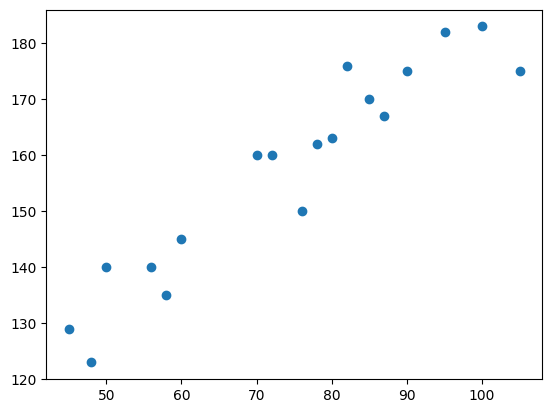

In [14]:
plt.scatter(x_train,y_train)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

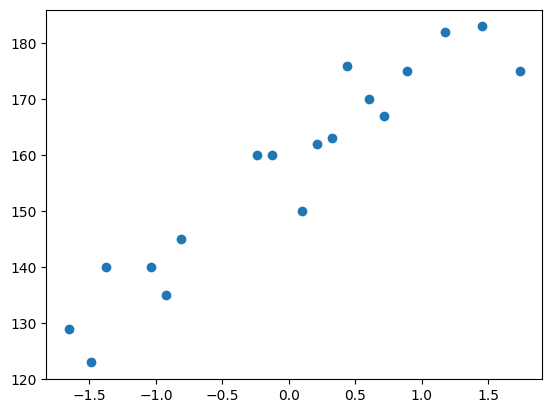

In [17]:
plt.scatter(x_train,y_train)

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [19]:
linreg.fit(x_train,y_train)




LinearRegression()

In [21]:
linreg.coef_

array([17.03440872])

In [22]:
linreg.intercept_

np.float64(157.5)

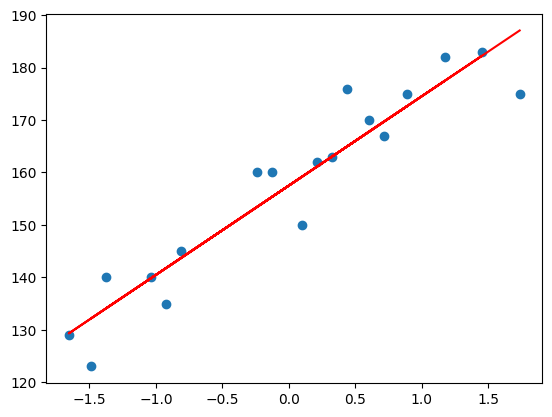

In [24]:
plt.scatter(x_train,y_train)
plt.plot(x_train,linreg.predict(x_train),color='r')

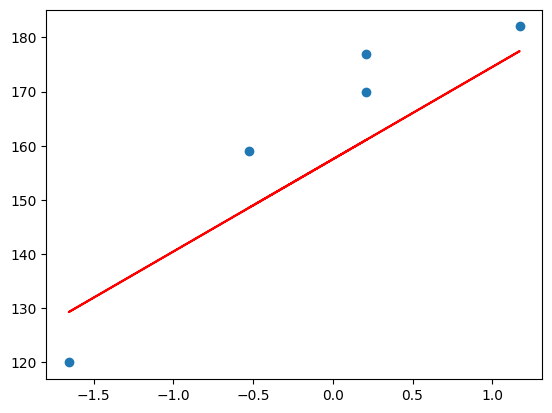

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,linreg.predict(x_test),color='r')

In [26]:
y_pred_test = linreg.predict(x_test)
y_pred_train = linreg.predict(x_train)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [28]:
print("mse",mean_squared_error(y_test,y_pred_test))
print("mae",mean_absolute_error(y_test,y_pred_test))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred_test)))

mse 109.77592599051664
mae 9.822657814519232
rmse 10.477400726827081


In [29]:
print("score",r2_score(y_test,y_pred_test))

score 0.776986986042344


In [31]:
scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [32]:
linreg.predict([scaled_weight[0]])

array([163.01076266])